In [19]:
%display latex

In [20]:
import sys, os, warnings
from contextlib import contextmanager

@contextmanager
def suppress_stdout():
    with open(os.devnull, "w") as devnull:
        old_stdout = sys.stdout
        sys.stdout = devnull
        try:  
            yield
        finally:
            sys.stdout = old_stdout

import matplotlib
import matplotlib.pyplot as plt
            
@contextmanager
def suppress_warnings():
    with warnings.catch_warnings():
        warnings.simplefilter("ignore")
        yield
        
matplotlib.use("pgf")
matplotlib.rcParams.update({
    "pgf.texsystem": "pdflatex",
    'font.family': 'sans',
    'text.usetex': True,
    'pgf.rcfonts': False,
    "axes.labelsize": 8,
    "font.size": 8,
})
textwidth = 6.26894

In [21]:
from lbuc import *
from lbuc.bondcalculus import *

## Model

In [22]:
m = BondModel("WhelksAndLobsters.bond")

Running cmd: 'load "WhelksAndLobsters.bond"' ...


In [23]:
k = 0.8; b = 0.6; c = 0.3; e = 0.05; f = 2

In [24]:
P = Atomic((var("Whelk") - 1)^2 + var("Lobster")^2 < 0.2)

In [25]:
Qbox = [RIF(0, 0.31), RIF(1.5, 4)]

In [26]:
Q = (  Atomic(var("Whelk") < Qbox[0].upper())
     & Atomic(var("Whelk") > Qbox[0].lower())
     & Atomic(var("Lobster") < Qbox[1].upper())
     & Atomic(var("Lobster") > Qbox[1].lower()) )

In [27]:
s3 = m.process("[0, 1.4] Whelk || [0, 8] Lobster with network N(0.8, 0.6, 0.3, 0.05, 2)").as_system

Running cmd: 'savesage "[0, 1.4] Whelk || [0, 8] Lobster with network N(0.8, 0.6, 0.3, 0.05, 2)" "/tmp/bond-sage-script-03ma4fa8.py"' ...


## Parameter set 1

### Prop 1

In [28]:
kwargs = dict(step=0.05, order=6, estimation=1e-4, cutoff_threshold=1e-15, integration_method=2)

In [34]:
csign1 = F(RIF(0, 10), Q).context_signal_for_system(s3, 0, use_masks=True, **kwargs)

phi variables sfs = {x0, x1}
system sfs = System(R, (x0, x1), [[0 .. 8], [-6.6610000000000012e-17 .. 1.4000000000000002]], (-2*x0*x1^2 - 0.05000000000000000?*x0^2 + 1.600000000000000?*x0*x1 - 0.05000000000000000?*x0, 0.3000000000000000?*x0*x1^2 - 0.2400000000000000?*x0*x1 - 0.600000000000000?*x1^2 + 0.600000000000000?*x1), varmap=bidict({'Lobster': x0, 'Whelk': x1})))
Generating Reach Tree: 1 items in 0.00 seconds
 ==> creating ContextSignal with coord=(), signal = <function base_context_signal.<locals>.<lambda> at 0x7f928c02f3a0>, reach_tree = None, ctx_mask=<lbuc.context_masks.ContextMask object at 0x7f928c029bb0>
 ==> creating ContextSignal with coord=(), signal = functools.partial(<bound method Atomic.signal_fn of Atomic(Whelk < 0.310000000000000)>, precompose_systems=False, step=0.0500000000000000, order=6, estimation=0.000100000000000000, cutoff_threshold=1.00000000000000e-15, integration_method=2, instrumentor=<flowstar.instrumentation.AggregateMetric object at 0x7f928ca43bc0>, 

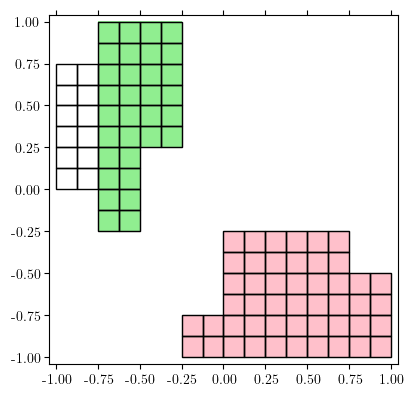

In [36]:
with suppress_stdout():
    plo2b = csign1.plot_histogram2d(4, flip=True)

plo2b

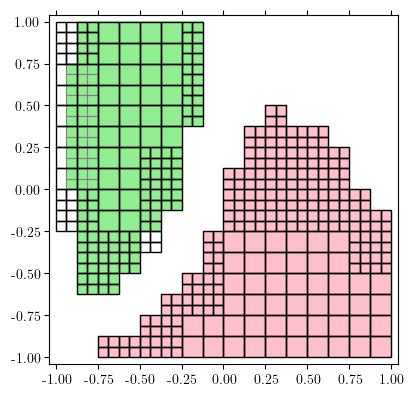

In [37]:
with suppress_stdout():
    plo2b = csign1.plot_histogram2d(5, flip=True)
    
plo2b

In [ ]:
with suppress_stdout():
    plo2b = csign1.plot_histogram2d(6)
    
plo2b

### Prop 2

In [38]:
csign2 = F(RIF(0, 5), G(RIF(0, 5), P)).context_signal_for_system(s3, 0, use_masks=True, **kwargs)

phi variables sfs = {x0, x1}
system sfs = System(R, (x0, x1), [[0 .. 8], [-6.6610000000000012e-17 .. 1.4000000000000002]], (-2*x0*x1^2 - 0.05000000000000000?*x0^2 + 1.600000000000000?*x0*x1 - 0.05000000000000000?*x0, 0.3000000000000000?*x0*x1^2 - 0.2400000000000000?*x0*x1 - 0.600000000000000?*x1^2 + 0.600000000000000?*x1), varmap=bidict({'Lobster': x0, 'Whelk': x1})))
Generating Reach Tree: 1 items in 0.00 seconds
 ==> creating ContextSignal with coord=(), signal = functools.partial(<bound method Atomic.signal_fn of Atomic(Lobster^2 + (Whelk - 1)^2 < 0.200000000000000)>, precompose_systems=False, step=0.0500000000000000, order=6, estimation=0.000100000000000000, cutoff_threshold=1.00000000000000e-15, integration_method=2, instrumentor=<flowstar.instrumentation.AggregateMetric object at 0x7f927b1e5200>, print_timings=False, unpreconditioning_order=6, initial_form=<InitialForm.SPLIT_VARS: 3>), reach_tree = <lbuc.reach_trees.ReachTree object at 0x7f928c018f10>, ctx_mask=<lbuc.context_mask

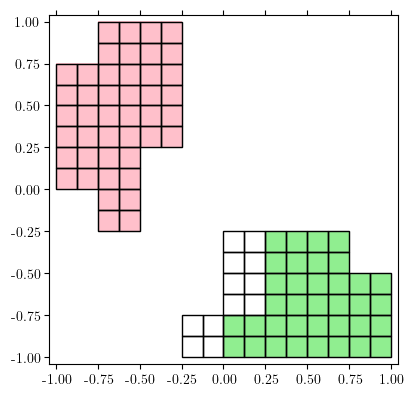

In [39]:
with suppress_stdout():
    plo3 = csign2.plot_histogram2d(4, flip=True)

plo3

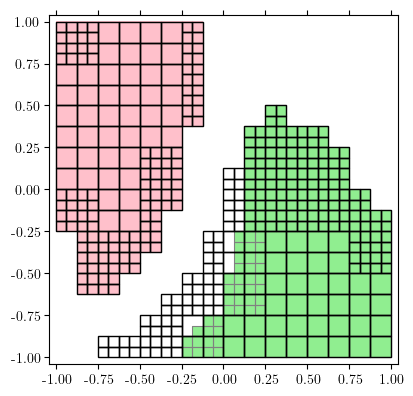

In [40]:
with suppress_stdout():
    plo3 = csign2.plot_histogram2d(5, flip=True)

plo3

### Physical Tree

In [ ]:
kwargs = dict(step=0.05, order=6, estimation=1e-4, cutoff_threshold=1e-15, integration_method=2)

In [72]:
from lbuc import RestrictionMethod

In [73]:
csignp = F(RIF(0, 10), Q).context_signal_for_system(s3, 0, use_masks=True, restriction_method=RestrictionMethod.RECOMPUTE_FLOWPIPE, **kwargs)

phi variables sfs = {x0, x1}
system sfs = System(R, (x0, x1), [[0 .. 8], [-6.6610000000000012e-17 .. 1.4000000000000002]], (-2*x0*x1^2 - 0.05000000000000000?*x0^2 + 1.600000000000000?*x0*x1 - 0.05000000000000000?*x0, 0.3000000000000000?*x0*x1^2 - 0.2400000000000000?*x0*x1 - 0.600000000000000?*x1^2 + 0.600000000000000?*x1), varmap=bidict({'Lobster': x0, 'Whelk': x1})))
Generating Reach Tree: 1 items in 0.00 seconds
 ==> creating ContextSignal with coord=(), signal = <function base_context_signal.<locals>.<lambda> at 0x7f4cf8f8b5e0>, reach_tree = None, ctx_mask=<lbuc.context_masks.ContextMask object at 0x7f4cf8f80e50>
 ==> creating ContextSignal with coord=(), signal = functools.partial(<bound method Atomic.signal_fn of Atomic(Whelk < 0.310000000000000)>, precompose_systems=False, step=0.0500000000000000, order=6, estimation=0.000100000000000000, cutoff_threshold=1.00000000000000e-15, integration_method=2, instrumentor=<flowstar.instrumentation.AggregateMetric object at 0x7f4cf8f88b80>, 

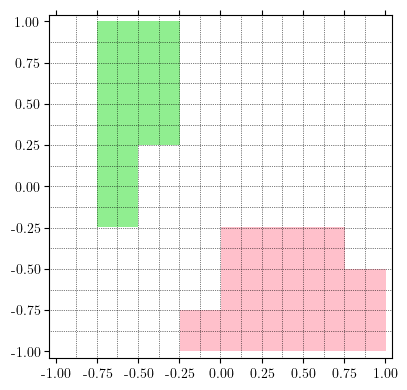

In [74]:
with suppress_stdout():
    plo2 = csignp.plot_histogram2d(4, flip=True)

plo2

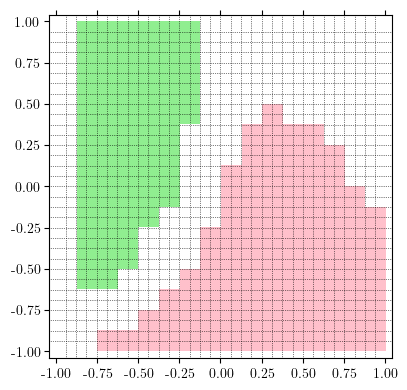

In [75]:
with suppress_stdout():
    plo2 = csignp.plot_histogram2d(5, flip=True)

plo2